### Implementing feedforward neural network with Keras and TensorFlow (Use CIFAR10 dataset)

In [6]:
# Import TensorFlow and relevant libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [10]:
train_data_dir = 'cifar-10-img/cifar-10-img/train'
test_data_dir = 'cifar-10-img/cifar-10-img/test'

In [11]:
# Set up an ImageDataGenerator to rescale pixel values to [0, 1]
image_data_generator = ImageDataGenerator(rescale=1.0/255)

# Define batch sizes
train_batch_size = 20000
test_batch_size = 2000

# Create data generators for training and testing
train_generator = image_data_generator.flow_from_directory(
    train_data_dir,
    target_size=(32, 32),  # Resize images to 28x28 pixels
    batch_size=train_batch_size,  # Number of images per training batch
    class_mode='categorical',  # One-hot encoded labels
    shuffle=True,  # Shuffle the order of images during training
)

test_generator = image_data_generator.flow_from_directory(
    test_data_dir,
    target_size=(32, 32),  # Resize images to 28x28 pixels
    batch_size=test_batch_size,  # Number of images per testing batch
    class_mode='categorical',  # One-hot encoded labels
    shuffle=True,  # Shuffle the order of images during testing
)

Found 40079 images belonging to 10 classes.
Found 9921 images belonging to 10 classes.


In [13]:
x_train, y_train = train_generator[0]
x_test, y_test = test_generator[0]

In [14]:
print(f"Shape of X_train {x_train.shape}")
print(f"Shape of y_train {y_train.shape}")
print(f"Shape of x_test  {x_test.shape}")
print(f"Shape of y_test  {y_test.shape}")

Shape of X_train (20000, 32, 32, 3)
Shape of y_train (20000, 10)
Shape of x_test  (2000, 32, 32, 3)
Shape of y_test  (2000, 10)


In [15]:
num_classes = 10
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

In [16]:
x_train.shape[1:]

(32, 32, 3)

In [17]:
# Create a list of layers
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.BatchNormalization(),
    
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    
    keras.layers.Flatten(),
    
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.2),
    
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.2),
    
    keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                        

In [18]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test), batch_size=10, shuffle=True)

Epoch 1/5
2000/2000 [==============================] - 50s 25ms/step - loss: 1.6564 - accuracy: 0.4058 - val_loss: 1.3833 - val_accuracy: 0.4945
Epoch 2/5
2000/2000 [==============================] - 49s 25ms/step - loss: 1.2793 - accuracy: 0.5487 - val_loss: 1.3636 - val_accuracy: 0.5310
Epoch 3/5
2000/2000 [==============================] - 50s 25ms/step - loss: 1.0989 - accuracy: 0.6108 - val_loss: 1.0874 - val_accuracy: 0.6070
Epoch 4/5
2000/2000 [==============================] - 48s 24ms/step - loss: 0.9732 - accuracy: 0.6575 - val_loss: 1.0370 - val_accuracy: 0.6405
Epoch 5/5
2000/2000 [==============================] - 54s 27ms/step - loss: 0.8619 - accuracy: 0.6985 - val_loss: 0.9929 - val_accuracy: 0.6525


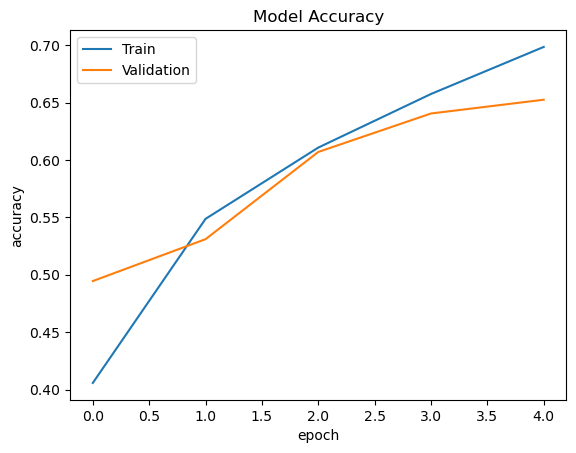

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', "Validation"], loc='upper left')

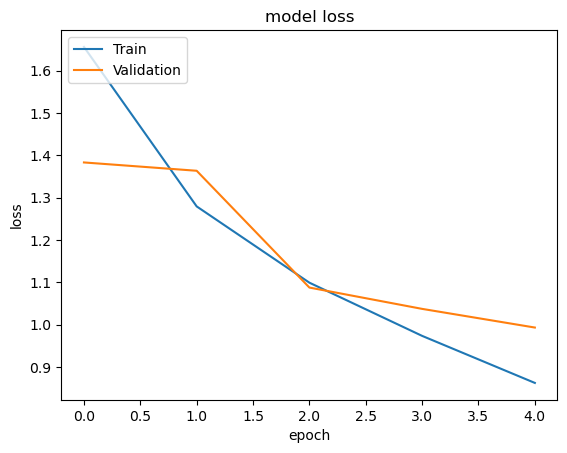

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

In [22]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Loss: ", test_loss)
print("Accuracy: ", test_acc)

63/63 [==============================] - 1s 12ms/step - loss: 0.9929 - accuracy: 0.6525
Loss:  0.9928693175315857
Accuracy:  0.6524999737739563


63/63 [==============================] - 1s 11ms/step


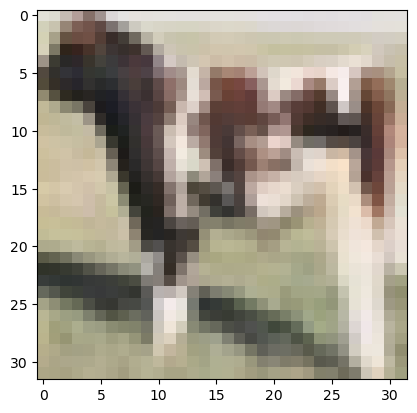

dog


In [23]:
predicted_value=model.predict(x_test)
plt.imshow(x_test[20])
plt.show()
print(class_names[np.argmax(predicted_value[20], axis=0)])